<a href="https://colab.research.google.com/github/KartikIITB/EE769-Assignments/blob/main/Assignment_1_Instructions_Template_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 
4. Write your names here: 
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Normalize function 



In [ ]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    # YOUR CODE HERE
    X_norm = (X - X.mean(axis = 0))/X.std(axis = 0)

    return X_norm
    
    raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [ ]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    # YOUR CODE HERE
    X_aug = np.c_[X, np.ones(X.shape[0])] # X augumented to [X 1]
    y = X_aug.dot(w) # y = [X 1]w (Matrix multiplication) is the prdicted output

    return y
    raise NotImplementedError()


In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [ ]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    # YOUR CODE HERE
    y = Prediction(X, w) 
    MSE = (t-y).dot(t-y)/(t.size) # Mean Square Error/Loss

    return MSE
    
    raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [ ]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    # YOUR CODE HERE
    y = Prediction(X, w)
    MAE = np.sum(np.abs(t-y))/(t.size) # Mean Absolute Error/Loss

    return MAE
    
    raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [ ]:
def L2_Loss (X, t, w, lamda): # Output should be a single number based on L2-norm (with sqrt)
    ''' Need to specify what inputs are'''
    # YOUR CODE HERE
    L2_norm_w = np.linalg.norm(w[:len(w)-1], ord = 2) # L2(w) = sqrt(<w,w>) (excluding the bias term)
    MSE = MSE_Loss(X, t, w)

    return MSE + lamda*L2_norm_w

    raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [ ]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    # YOUR CODE HERE
    L1_norm_w = np.linalg.norm(w[:len(w)-1], ord = 1) # L1(w) = <|w|,1> (excluding the bias term), where 1 is the vector of all one's 
    MSE = MSE_Loss(X, t, w)

    return MSE + lamda*L1_norm_w
    
    raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [ ]:
def NRMSE_Metric (X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)
    # YOUR CODE HERE
    RMSE = np.sqrt(MSE_Loss(X, t, w)) # RMSE = sqrt(MSE)
    NRMSE = RMSE/(t.std()) # NRMSE (Normalized by variance of target t) = RMSE/(std dev of t)

    return NRMSE
    
    raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [ ]:
def MSE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    # MSE = sqrt(<t-y,t-y>)/N => d(MSE)/dw = -2/N*<t-y,dy/dw> = -2/N*<t-y,X>

    X_aug = np.c_[X, np.ones(X.shape[0])] # As prediction is carried out using [X 1] and not X
    y = Prediction(X, w)
    MSE_grad = -2*(t-y).dot(X_aug)/t.size # MSE_grad = -2/N*<t-y,X_aug>

    return MSE_grad
    
    raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [ ]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    X_aug = np.c_[X, np.ones(X.shape[0])] # As prediction is carried out using [X 1] and not X
    y = Prediction(X, w) # Predicted y

    # MAE = sum(|t-y|)/N => d(MAE)/dw = -1/N*<(|t-y|./(t-y)),dy/dw> = -1/N*<(|t-y|./(t-y)),X>
    MAE_grad = -(np.abs(t-y)/(t-y)).dot(X_aug)/t.size # MAE_grad = -1/N*<(|t-y|./(t-y)),X>

    return MAE_grad
    
    raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 , 0.5 , 0.]),decimal=3)


In [ ]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    MSE_grad = MSE_Gradient(X, t, w) # Initialize MSE gradient
    L2_grad = np.zeros(MSE_grad.shape[0]) # Initialize L2 gradient

    # L2 = MSE + lamda*sqrt(<w,w>) => d(L2)/dw = d(MSE)/dw + lamda*w/sqrt(<w,w>)
    L2_grad[:len(w)-1] = MSE_grad[:len(w)-1] + lamda*(w[:len(w)-1]/np.linalg.norm(w[:len(w)-1], ord = 2))
    L2_grad[-1] = MSE_grad[-1]

    return L2_grad
    
    raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [ ]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    MSE_grad = MSE_Gradient(X, t, w) # Initialize MSE gradient
    L1_grad = np.zeros(MSE_grad.shape[0]) # Initialize L1 gradient

    # L1 = MSE + lamda*sum(|w|) => d(L2)/dw = d(MSE)/dw + lamda*w./|w|
    L1_grad[:len(w)-1] = MSE_grad[:len(w)-1] + lamda*(w[:len(w)-1]/np.abs(w[:len(w)-1]))
    L1_grad[-1] = MSE_grad[-1]

    return L1_grad
    
    raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [ ]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    # YOUR CODE HERE

    # Initilaization
    i = 0 # Iteration
    w_final = w # Weights

    NRMSE_prev = 0 # Previous NRMSE
    NRMSE_curr = NRMSE_Metric(X, t, w_final) # Current NRMSE on training data

    
    #while abs(NRMSE_prev - NRMSE_curr) >= epsilon: # |NRMSE(w_curr) - NRMSE(w_prev)| >= epsilon
    for i in range(max_iter): # i < max_iter
      NRMSE_prev = NRMSE_curr # w_prev = w_curr => NRMSE(w_prev) = NRMSE(w_curr) 
      w_final = w_final - lr*(gradfunc(X, t, w_final, lamda)) # w_curr = w_prev - eta*NRMSE(w_prev)
      NRMSE_curr = NRMSE_Metric(X, t, w_final) # NRMSE(w_curr)
      #else:
        #break
      #i += 1

    train_loss_final = lossfunc(X, t, w_final, lamda) # Final loss on training data (X, t)
    validation_loss_final = lossfunc(X_val, t_val, w_final, lamda) # Final loss on validation data (X_val, t_val)
    validation_NRMSE =  NRMSE_Metric(X_val, t_val, w_final) # Normalized RMSE on validation data

    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this

    raise NotImplementedError()
    

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

In [ ]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    # YOUR CODE HERE
    X_aug = np.c_[X, np.ones(X.shape[0])] # X_aug = [X 1]
    pseudo_inv_X = (X_aug.T).dot(X_aug) # pseudo_inv(X_aug) = (X_aug'X_aug)^(-1)*X_aug'
    pseudo_inv_X = np.linalg.inv(pseudo_inv_X + lamda*np.eye(pseudo_inv_X.shape[0])).dot(X_aug.T) # Regularized pseudo inverse
    w = pseudo_inv_X.dot(t) # w = pseudo_inv(X_aug)*t

    return w

    raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#... Part 1 ends Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


In [ ]:
df_train = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv')
df_test = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv')

In [ ]:
df_train.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2


In [ ]:
X = df_train.iloc[:, :17]
t = df_train['Next_Tmax']

In [ ]:
X.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507


In [ ]:
t.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [ ]:
X_norm = Normalize(X) # Normalizing train data

In [ ]:
# 80:20 split for training and validation

train_samples = int(0.8*X_norm.shape[0])
val_samples = X_norm.shape[0] - train_samples

X_train = X_norm.iloc[:train_samples, :]
t_train = t.iloc[:train_samples]

X_val = X_norm.iloc[:val_samples, :]
t_val = t.iloc[:val_samples]


In [ ]:
print(X_train.shape)
print(X_val.shape)

(4865, 17)
(1217, 17)


In [ ]:
inv_lamdas = np.linspace(0.01, 20, num = 100) # Range of lamde values
metric_outputs = pd.DataFrame(np.zeros([inv_lamdas.size, 3]), index = 1/inv_lamdas, columns = ['train_loss', 'val_loss', 'val_NRMSE'])
weights = pd.DataFrame(np.zeros([inv_lamdas.size, X_train.shape[1]+1]), index = 1/inv_lamdas)

for lamda in 1/inv_lamdas:
  w = np.random.randn(X_train.shape[1]+1)
  weights.loc[lamda, :], metric_outputs.loc[lamda, 'train_loss'], metric_outputs.loc[lamda, 'val_loss'], metric_outputs.loc[lamda, 'val_NRMSE'] = Gradient_Descent(X_train, X_val, t_train, t_val, w, lamda, 1000, 1e-10, 1e-5, L2_Loss, L2_Gradient)

In [ ]:
metric_outputs.loc[:, 'val_NRMSE']

,train_loss,val_loss,val_NRMSE
100.000000,1324.644342,1225.626859,10.445306
4.718780,867.714624,939.571175,11.187462
2.416402,933.181692,950.333054,11.317876
1.624016,894.533978,884.757777,10.943867
1.222977,887.658376,971.725805,11.480289
...,...,...,...
0.052104,926.945807,940.225460,11.316830
0.051562,957.484975,880.393935,10.950841
0.051030,1001.884066,980.141438,11.554552
0.050510,851.007575,972.954463,11.512236


In [ ]:
weights.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
100.000000,-0.905993,0.338227,2.162746,-1.076763,0.812936,0.333275,0.277707,-0.030607,-0.503959,-0.443834,-0.414552,0.848268,1.266977,0.002496,-0.571451,2.167428,-1.566303,0.418762
4.718780,-1.315608,0.316189,-0.639349,0.218192,0.775548,-0.602904,-2.037079,0.084872,0.607575,-0.408755,-2.129764,-0.472939,0.752736,-1.603754,-1.725414,0.243950,-0.886266,1.180423
2.416402,2.201308,-0.166328,-0.245057,-0.558872,0.614571,-0.778526,1.090037,-0.561041,0.804644,1.390020,0.718116,0.998195,-1.524562,-1.018596,-1.534589,-0.137154,0.260696,0.132375
1.624016,1.033754,-0.321182,0.116309,-0.316493,0.828210,-0.316061,0.432855,0.099538,1.303887,-1.156323,-2.404143,0.128420,0.138900,0.760084,0.681483,-0.117086,-0.252166,0.433184
1.222977,0.047276,-1.144002,-0.684167,-0.157343,-0.241633,-1.145293,0.150112,-0.557903,-1.762898,2.049206,-0.595869,0.964707,0.317704,0.223638,-0.283797,-0.616388,-0.052100,0.269619


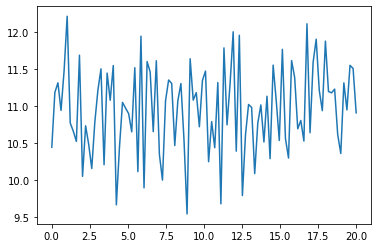

In [ ]:
plt.plot(inv_lamdas, metric_outputs.loc[:, 'val_NRMSE'])

In [43]:
lamda_min = metric_outputs.loc[:, 'val_NRMSE'].idxmin()
weights.loc[lamda_min, :]

0     0.104821
1     0.408500
2     0.257630
3     0.447388
4     0.140100
5    -1.014221
6     0.969719
7    -1.961773
8    -1.159286
9     1.653331
10    0.793001
11   -2.016711
12    0.927363
13    0.945268
14   -0.713329
15    0.836430
16    0.943137
17    2.936861
Name: 0.11242973141786385, dtype: float64

#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code): 
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 